## 예측함수

#### 예측함수의 내부 구조

예측함수의 정의

In [1]:
from torch import nn
import torch

#레이어함수 정의
#첫 번째 선형 함수
#784 입력 수
#128 출력 수
l1 = nn.Linear(784, 128)

#두 번째 선형 함수
#128입력 수
#10 출력 수
l2 = nn.Linear(128, 10)

#활성화 함수
relu = nn.ReLU(inplace=True)


"""
l1의 출력과 l2의 입력이 같음
--> 128이라는 값이 바로 '은닉층'의 노드 수에 해당
"""

"\nl1의 출력과 l2의 입력이 같음\n--> 128이라는 값이 바로 '은닉층'의 노드 수에 해당\n"

예측함수의 간단한 구현 예시

In [2]:
#입력 텐서로부터 출력 텐서를 계산

#더미 입력 데이터 작성
inputs = torch.randn(100, 784) #100행784열

#중간텐서 1계산
m1 = l1(inputs)

#중간텐서 2 계산
m2 = relu(m1)

#출력 텐서 계산
outputs = l2(m2)

#입력 텐서와 출력 텐서 shape확인
print('입력 텐서: ', inputs.shape)
print('출력 텐서: ', outputs.shape)


입력 텐서:  torch.Size([100, 784])
출력 텐서:  torch.Size([100, 10])


In [3]:
#직렬로 이어지는 함수는 nn.Sequential을 사용하여 묶음
net2 = nn.Sequential(
    l1,
    relu,
    l2
)#m1, m2와 같은 중간텐서는 파이토치에서 명시적으로 출현하지 않는 경우가 많음

outputs2 = net2(inputs)

print('입력 텐서: ', inputs.shape)
print('출력 텐서: ', outputs2.shape)

입력 텐서:  torch.Size([100, 784])
출력 텐서:  torch.Size([100, 10])


활성화 함수의 목적

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#훈련 데이터, 검증 데이터 계산
np.random.seed(1234)
x = np.random.randn(100, 1)

#y = x^2 + 난수의 1/10
y = x**2 + np.random.randn(100, 1) * 0.1

#데이터를 훈련 50, 검증 50으로 나눔
x_train = x[:50, :]
x_test = x[50:, :]
y_train = y[:50, :]
y_test = y[50:, :]

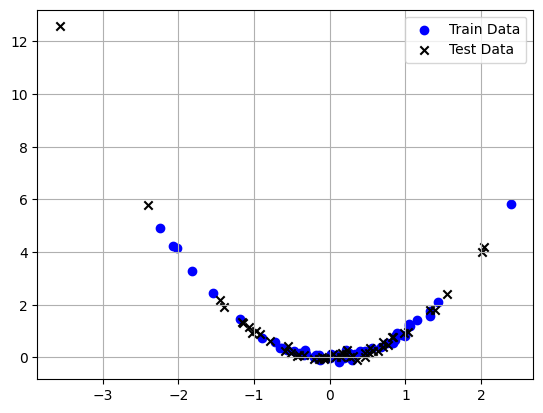

In [9]:
#학습 데이터 산포도 출력
plt.scatter(x_train, y_train, c='b', label = 'Train Data')
plt.scatter(x_test, y_test, c='k',marker='x' ,label = 'Test Data')
plt.legend()
plt.grid()
plt.show()